# Projeto 2 - Ciência dos Dados


# Predição de AVC

Alunos:

Jonas Bonfá

Renato Falcão

Gabriel de Araújo 

Ricardo Mourão




## Sumário

- [Introdução](#introducao)
    - [O que é AVC?](#avc)
    - [Gravidade do Problema](#problema)
- [Importando Bibliotecas necessárias](#imports)
- [Sobre a base de Dados](#sobredf)
- [Target, Features e mudanças principais para a base de dados](#tfem)
    - [Base de dados Original](#originaldf)
    - [Implementando Categorização nas variáveis ordinais](#categorizacao)
    - [Removendo dados inválidos ou fora do padrão](#removedados)
        - [Indentificação de possíveis linhas fora de padrão (Outliers)](#linhasoutliers)
        - [Indentificação de possíveis variáveis quantitativas fora de padrão (Outliers)](#varquantoutliers)
        - [Removendo linhas nulas](#tiranulas)
        - [Mudando o Dataframe](#mudandodf)
- [Análise Exploratória](#analiseexploratoria)
    - [Introdução à Análise Exploratória](#introdanalise)
    - [Análise das variáveis quantitativas](#analisevarquant)
        - [Variáveis BMI e AVG_glucose_level](#varbmiavggl)
        - [Variável age](#varage)
    - [Análise das variáveis categóricas](#analisevarquali)
    - [Distribuição dos Pacientes](#distribpacientes)
- [Modelos de predição](#modelos)
    - [Definição](#definicao)
    - [Tipos de modelos](#tiposmodelos)
- [Regressão Logística (Logistic Regression)](#regreslog)
    - [Definição do modelo](#defregres)
    - [Outra Definição do modelo](#defregres2)
    - [Pontos auxiliares](#pontosaux)
    - [Função Sigmóide](#funcsigmoide)
    - [Vantagens da Regressão Logística](#vantagensregres)
    - [1° Passo: Implementando o Modelo](#passo1regres)
    - [2° Passo: Implementando a validação cruzada](#passo2regres)
    - [3° Passo: Matriz de confusão](#passo3regres)
    - [Resultados](#resultregres)
    - [Acurácia - Matriz de confusão](#acuraciaregres)
    - [Conclusão sobre o modelo de Regressão Logística](#conclusaoregres)
- [Árvore de decisão](#arvoredecisao)
    - [Definição do modelo](#defarvoredecisao)
    - [Vantagens da Árvore de decisão](#vantagensarvore)
    - [Desvantagens da Árvore de decisão](#desvantagensarvore)
    - [Exemplo](#exemploarvore)
    - [Terminologias](#terminologarvore)
    - [Qual o objetivo da árvore de decisão?](#objetarvore)
    - [Como evitar o overfitting?](#evitaroverfit)
    - [Como vai funcionar a base de dados?](#comofunciona)
    - [1° Passo: Implementando a árvore de decisão](#passo1arvore)
    - [2° Passo: Validação Cruzada](#passo2arvore)
    - [ 3° Passo: Matriz de Confusão](#passo3arvore)
    - [Resultados](#resultarvore)
    - [Acurácia - Matriz de confusão](#acuraciaarvore)
    - [Conclusão sobre o modelo de Árvore de decisão](#conclusaoarvore)
- [Conclusão](#conclusaogeral)
    - [Comparação dos modelos](#comparamodelos)
- [Referências](#referencias)




<div id="introducao"></div>

# Introdução

<div id="avc"></div>

## O que é AVC?


O AVC (CID 10 - I64) é o entupimento ou rompimento dos vasos que levam sangue ao cérebro, provocando a paralisia da região afetada no cérebro. Também é chamado de acidente vascular cerebral, derrame cerebral ou Acidente Vascular Encefálico (AVE)
Fonte:https://www.minhavida.com.br/saude/temas/avc


<div id="problema"></div>

## Gravidade do Problema


Segundo a Organização Mundial da Saúde (OMS), o AVC é a segunda principal causa de morte no mundo, responsável por aproximadamente 11% do total de óbitos.
Este conjunto de dados é usado para prever se um paciente provavelmente terá um AVC com base nos parâmetros de entrada, como sexo, idade, várias doenças e estado de tabagismo. Cada linha nos dados fornece informações de renome sobre o paciente.

Fonte Traduzida:https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

Sabemos que o AVC, mais conhecido como acidente vascular cerebral ou derrame, é uma doença que, nos tempos atuais, acomete ainda um grande número de pessoas, baseado nisso uma base de dados <a href="https://www.kaggle.com/fedesoriano/stroke-prediction-dataset">sobre pacientes que possuem ou não AVC</a> do site Kaggle que diz respeito a ocorrência de AVCs pretende responder a seguinte pergunta: 

Baseado nos dados de saúde e socio-econômicos de um paciente, será que ele teve ou não um AVC(acidente vascular cerebral)?

Para isso vamos precisar de bibliotecas de machine learning que serão de fundamental importância para a predição do fenômeno análisado, bem como 2 modelos de predição (Árvore de Decisão e Regressão Logística) que nos ajudarão a responder a pergunta principal!

<div id="imports"></div>

# Importando Bibliotecas necessárias

In [1]:

%matplotlib inline
import math
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import pandas as pd
from random import randint
# Remove warnings
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML  # Para ter melhor print.
from math import *

# Modelos preditivos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Módulos complementares para os modelos preditivos
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix


In [2]:
print("Esperamos trabalhar no diretório")
print(os.getcwd())
filename = 'healthcare-dataset-stroke-data.csv'

if filename in os.listdir():
    print(f'Parece que o arquivo {filename} está na mesma pasta do notebook da avaliação, yay!\n')
    
else:
    print(f'Não encontrei o arquivo {filename}.\n'
          f'O notebook e os arquivos de dados desta avaliação devem ser salvos dentro da mesma pasta no seu computador.\n')

Esperamos trabalhar no diretório
C:\Users\PC\Desktop\2 SEMESTRE\CDADOS\Projeto 2\Proj2 minha copia
Parece que o arquivo healthcare-dataset-stroke-data.csv está na mesma pasta do notebook da avaliação, yay!



<div id="sobredf"></div>

# Sobre a base de Dados

A base dados contém algumas informações coletadas de vários pacientes no momento do exame. A seguir, estão descritas as informações originais contidas no dataset:
<ol>
    <li>id: Informação referente a identificação do paciente (será retirada do dataset pois não importa para a análise).</li>
    <li>gender: Gênero do paciente (Male ou Female) - Será alterado para Homem e Mulher.</li>
    <li>age: Idade do paciente (em anos).</li>
    <li>hypertension (Hipertensão):
        <ul>
            <li>0: Paciente não tem Hipertensão.</li>
            <li>1: Paciente tem Hipertensão.</li>
        </ul></li>
    <li>heart_disease (cardiopatia):
        <ul>
            <li>0:Paciente não tem cardiopatia.</li>
            <li>1:Paciente tem cardiopatia.</li>
        </ul></li>
    <li>ever_married (é ou já foi casado):
        <ul>
            <li>"Yes": É ou já foi casado.</li>
            <li>"No": Nunca se casou.</li>
        </ul></li>
    <li>work_type (tipo de trabalho do paciente):
        <ul>
            <li>Private: Trabalho Privado.</li>      
            <li>Self-employed: Autônomo.</li>
            <li>children: Criança - Não Trabalha.</li>       
            <li>Govt_job: Trabalha para o governo.</li>         
            <li>Never_worked: Nunca Trabalhou.</li>
        </ul></li>
    <li>Residence_type (tipo de residência):
        <ul>
            <li>Urban: Urbana.</li>
            <li>Rural: Rural.</li>
        </ul></li>
    <li>avg_glucose_level: Refere-se ao nível médio de glucose no sangue do paciente.</li>
    <li>bmi (body mass index): Índice de massa corpórea (IMC)(relação entre altura e peso).</li>
    <li>smoking_status: Status de fumante
        <ul>
            <li>never smoked: Nunca fumou.</li>    
            <li>Unknown: Informação desconhecida.</li>    
            <li>formerly smoked: Ex-fumante.</li>
            <li>smokes: Fuma atualmente.</li>
        </ul></li>
    <li>stroke: indica se o paciente teve ou não AVC
        <ul>
            <li>0:Não teve AVC.</li>
            <li>1:teve AVC.</li>
        </ul></li>
</ol>


<div id="tfem"></div>

# Target, Features e mudanças principais para a base de dados

Target: No caso a váriavel escolhida foi o Stroke, ou seja, se o paciente teve ou não AVC. Nesse sentido, essa é a variável dependente, isto é, ela dependerá de todas as outras para a ánalise dos dados e predição da pergunta feita anteriormente.<br>
Features: Variáveis independentes são consideradas todas as outras colunas do dataset que irão auxiliar na predição da variável target.

Mudanças necessárias:

- Transformar algumas colunas (variáveis) para categóricas: Gender, Hypertension, heart_disease, stroke (possuem 0 ou 1 nos dados).
- Colocar em português as categorias de variáveis como: ever_married, work_type, Residence_type, smoking_status, bem como deixar em português todas as colunas do dataframe.
- Limpar ou incrementar possíveis dados nulos no dataframe.
- Identificar nas variáveis quantitativas quem destoa de algum padrão e, por isso, pode ficar de fora do dataset, lembrando que chamamos de outliers.

<div id="originaldf"></div>

## Base de dados Original

In [3]:
Stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
Stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<div id="categorizacao"></div>

## Implementando Categorização nas variáveis ordinais

In [4]:
#transformando variáveis em categóricas
Stroke['gender'] = Stroke['gender'].astype('category')
Stroke['hypertension'] =Stroke['hypertension'].astype('category')
Stroke['stroke'] = Stroke['stroke'].astype('category')
Stroke['smoking_status'] = Stroke['smoking_status'].astype('category')
Stroke['Residence_type'] = Stroke['Residence_type'].astype('category')
Stroke['work_type'] = Stroke['work_type'].astype('category')
Stroke['heart_disease'] = Stroke['heart_disease'].astype('category')
Stroke["ever_married"]=Stroke['ever_married'].astype('category')
#Categorizando as variáveis com diferentes nomes afim de facilitar nossa análise
Stroke['gender'].cat.categories = ["Mulher","Homem","Outro"]
Stroke['hypertension'].cat.categories =["Não Hipertenso","Hipertenso"]
Stroke['stroke'].cat.categories = ["Saudável","Doente"]
Stroke['smoking_status'].cat.categories = ["Desconhecido","Ex-Fumante","Nunca Fumou","Fumante"]
Stroke['Residence_type'].cat.categories = ["Rural","Urbano"]
Stroke['work_type'].cat.categories = ["Trabalho Governamental","Nunca Trabalhou","Privado"," Trabalhador Autônomo","Criança"]                
Stroke['heart_disease'].cat.categories = ['Não Cardiopata',"Cardiopata"]
Stroke["ever_married"].cat.categories=["Não","Sim"]


#Retirando coluna ID(não servirá para nossa amostra pois contem somente a identificação dos pacientes)
Stroke.drop(columns=["id"],inplace=True)




In [5]:
Stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Homem,67.0,Não Hipertenso,Cardiopata,Sim,Privado,Urbano,228.69,36.6,Ex-Fumante,Doente
1,Mulher,61.0,Não Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Rural,202.21,NaN,Nunca Fumou,Doente
2,Homem,80.0,Não Hipertenso,Cardiopata,Sim,Privado,Rural,105.92,32.5,Nunca Fumou,Doente
3,Mulher,49.0,Não Hipertenso,Não Cardiopata,Sim,Privado,Urbano,171.23,34.4,Fumante,Doente
4,Mulher,79.0,Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Rural,174.12,24.0,Nunca Fumou,Doente
...,...,...,...,...,...,...,...,...,...,...,...
5105,Mulher,80.0,Hipertenso,Não Cardiopata,Sim,Privado,Urbano,83.75,NaN,Nunca Fumou,Saudável
5106,Mulher,81.0,Não Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Urbano,125.20,40.0,Nunca Fumou,Saudável
5107,Mulher,35.0,Não Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Rural,82.99,30.6,Nunca Fumou,Saudável
5108,Homem,51.0,Não Hipertenso,Não Cardiopata,Sim,Privado,Rural,166.29,25.6,Ex-Fumante,Saudável


<div id="removedados"></div>

## Removendo dados inválidos ou fora do padrão

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

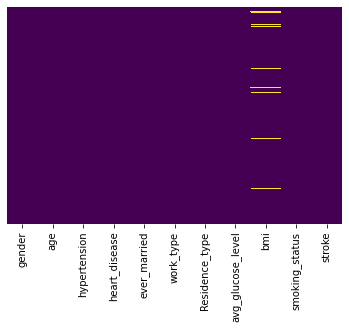

In [6]:
# heatmap da biblioteca seaborn para identificar elementos nulos, 
# bem como, o comando isnull que verifica linhas nulas
sns.heatmap(Stroke.isnull(),yticklabels=False,cbar=False,cmap="viridis")
Stroke.isnull().sum()

Observações:

- Na coluna BMI (indíce de massa corporéa) há 201 linhas nulas;
- Posteriormente na identificação de outliers as linhas nulas serão sujeitas a análise e poderão ser ou não retiradas do dataframe.

In [7]:
#Base de dados com categorizações em portugues para melhor visualização
Stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Homem,67.0,Não Hipertenso,Cardiopata,Sim,Privado,Urbano,228.69,36.6,Ex-Fumante,Doente
1,Mulher,61.0,Não Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Rural,202.21,NaN,Nunca Fumou,Doente
2,Homem,80.0,Não Hipertenso,Cardiopata,Sim,Privado,Rural,105.92,32.5,Nunca Fumou,Doente
3,Mulher,49.0,Não Hipertenso,Não Cardiopata,Sim,Privado,Urbano,171.23,34.4,Fumante,Doente
4,Mulher,79.0,Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Rural,174.12,24.0,Nunca Fumou,Doente


<div id="linhasoutliers"></div>

### Indentificação de possíveis linhas fora de padrão (Outliers)

In [8]:
Stroke.gender.value_counts()

Mulher    2994
Homem     2115
Outro        1
Name: gender, dtype: int64

Observações: 

Para o gênero, observamos um paciente com gênero não identificado como mulher ou homem, no entanto, para 5110 pacientes há apenas 1 paciente fora desses dois gêneros, o que constitui algo fora do padrão. Por isso, retirá-lo da amostra não impactará grandemente no resultado. Além disso, para esse paciente identificado não há outros pacientes para que possam ser feitas comparações e análises. Logo, retirá-lo não impactará na predição.

In [9]:
Stroke[Stroke.gender=="Outro"]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Outro,26.0,Não Hipertenso,Não Cardiopata,Não,Privado,Rural,143.33,22.4,Ex-Fumante,Saudável


In [10]:
#Retirando esse paciente 
Stroke.drop(index=3116,inplace=True)
Stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Homem,67.0,Não Hipertenso,Cardiopata,Sim,Privado,Urbano,228.69,36.6,Ex-Fumante,Doente
1,Mulher,61.0,Não Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Rural,202.21,NaN,Nunca Fumou,Doente
2,Homem,80.0,Não Hipertenso,Cardiopata,Sim,Privado,Rural,105.92,32.5,Nunca Fumou,Doente
3,Mulher,49.0,Não Hipertenso,Não Cardiopata,Sim,Privado,Urbano,171.23,34.4,Fumante,Doente
4,Mulher,79.0,Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Rural,174.12,24.0,Nunca Fumou,Doente
...,...,...,...,...,...,...,...,...,...,...,...
5105,Mulher,80.0,Hipertenso,Não Cardiopata,Sim,Privado,Urbano,83.75,NaN,Nunca Fumou,Saudável
5106,Mulher,81.0,Não Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Urbano,125.20,40.0,Nunca Fumou,Saudável
5107,Mulher,35.0,Não Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Rural,82.99,30.6,Nunca Fumou,Saudável
5108,Homem,51.0,Não Hipertenso,Não Cardiopata,Sim,Privado,Rural,166.29,25.6,Ex-Fumante,Saudável


<div id="varquantoutliers"></div>

### Indentificação de possíveis variáveis quantitativas fora de padrão (Outliers)

Para as variáveis quantitativas ou numéricas há de se perceber um certo padrão de valores em relação a essas colunas presentes no dataframe. Contudo, pode-se constatar a presença de outliers, isto é, valores que podem estar ou fora do padrão ou que não possuam sentido físico como, por exemplo, uma idade negativa (variável age) ou valores de glicose (variável avg_glucose_level) muito acima do esperado. Por isso, a indentificação para a possível retirada desses valores é de fundamental importância para o prosseguimento das análises.

In [11]:
var_numericas=Stroke.iloc[:,[1,7,8]]

In [12]:
# divisão dos pacientes entre doentes e saudáveis (para a variável Stroke) - Quem teve ou não AVC
stroke_column=list(Stroke.stroke.value_counts().index)
# importando bibliotecas para a análise interativa
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

        

In [13]:
@interact(numericas=sorted(['age','avg_glucose_level','bmi']))
def grafico_numericas(numericas):
        plt.figure(figsize=(18,6))
        plt.subplot(121)
        sns.histplot(data=Stroke, x=Stroke[numericas], hue='stroke', hue_order=stroke_column, multiple='layer',
        stat='density', bins=np.arange(min(Stroke[numericas]),max(Stroke[numericas]),6), element='step', palette=['#5683B3', '#E00705'])
        plt.ylabel('Densidade')
        plt.xlabel(f'{numericas}')
        plt.title(f'Densidade da incidência de AVC por {numericas}')
        plt.fontsize=14
        plt.subplot(122)
        sns.boxplot(x=Stroke.stroke,y=Stroke[numericas],data=Stroke)

interactive(children=(Dropdown(description='numericas', options=('age', 'avg_glucose_level', 'bmi'), value='ag…

Observações:
    <li> Variável Age: Em relação a idade dos pacientes percebe-se, em relação aos pacientes doentes (que tiveram AVC), a identificação, por meio do gráfico à direita, de 2 valores fora da faixa de números correspondentes a essa categoria, no entanto, segundo estudos do <a href="https://www.hospitalsiriolibanes.org.br/sua-saude/Paginas/avc-pode-ocorrer-criancas-adolescentes-chances-recuperacao-boas.aspx">hospital Sírio Libanes</a> há chances, apesar de menores, de crianças e jovens desenvolverem AVC (acidente vascular cerebral). Portanto, esses outliers não serão retirados no prosseguimento das análises.</li>
    <li>Variável avg_glucose_level: Para o nível de glicose percebe-se, tanto para os saudáveis quanto para os doentes, uma faixa de valores que varia de 55 até aproximadamente 272. Sob esse viés, de acordo com <a href="https://cerpe.com.br/saude/glicose-alta-baixa-normal#:~:text=Valores%20de%20refer%C3%AAncia%20de%20glicemia,inferior%20a%2070%20mg%2FdL.">os valores de referência</a> para índice glicêmico, os valores obtidos na faixa de valores citada anteriormente são possíveis, embora valores acima de 200 já serem considerados diabetes e precisam de cuidados. Dessa forma, não foram indentificados valores fisicamente impossíveis ou fora de um certo padrão, por isso, serão considerados todos os valores.</li>
    <li>Variável BMI: Em relação ao BMI (índice de massa corpórea) nota-se, para os pacientes saudáveis, <a href="https://www.minhavida.com.br/alimentacao/tudo-sobre/32159-imc">valores acima de 60</a>, que já são considerados altos e fora do padrão, no entanto, o valor máximo da variável na base de dados (97.6), bem como os outros valores acima de 60 são fisicamente possíveis. Sob esse viés, não haverá retirada de linhas para esta variável.</li>
    <li>Não havendo retirada de possíveis outliers, reitera-se que a não retirada desses valores considerados fora do padrão se deu por alguns motivos:</li>
    <ul>
        <li>A base de dados se refere aos pacientes analisados em relação ao AVC (Acidente Vascular Cerebral), dessa maneira, não se sabe como esses valores foram coletados e possíveis erros na coleta de informações podem ter sido cometidos, prejudicando a análise feita.</li>
        <li>Os valores encontrados, apesar de fora do padrão, não estão totalmente distantes da realidade, nem tampouco são impossiveis fisicamente. Logo, não há maiores motivos para a retirada destes números.</li>    

<div id="tiranulas"></div>

### Removendo linhas nulas

In [14]:
#identificacao da correlacao entre o BMI e as outras vairaveis numericas
var_numericas.corr()

,age,avg_glucose_level,bmi
age,1.000000,0.238323,0.333314
avg_glucose_level,0.238323,1.000000,0.175672
bmi,0.333314,0.175672,1.000000


Observacoes:
    <li>Há uma baixa correlação entre a variável BMI e as outras variáveis, logo, a reposição das linhas nulas em relação a variável BMI se torna mais dificil. Portanto, sabendo que a base de dados possui mais de 5000 valores pode-se retirar as 201 linhas nulas da variavel BMI sem, no entanto, identificar prejuizo a posteriores análises dessas variaveis independentes.</li>

In [15]:
# retirando linhas nulas
Stroke.dropna(inplace=True)

In [16]:
Stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Homem,67.0,Não Hipertenso,Cardiopata,Sim,Privado,Urbano,228.69,36.6,Ex-Fumante,Doente
2,Homem,80.0,Não Hipertenso,Cardiopata,Sim,Privado,Rural,105.92,32.5,Nunca Fumou,Doente
3,Mulher,49.0,Não Hipertenso,Não Cardiopata,Sim,Privado,Urbano,171.23,34.4,Fumante,Doente
4,Mulher,79.0,Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Rural,174.12,24.0,Nunca Fumou,Doente
5,Homem,81.0,Não Hipertenso,Não Cardiopata,Sim,Privado,Urbano,186.21,29.0,Ex-Fumante,Doente


<div id="mudandodf"></div>

## Mudando o Dataframe

Para a prática do machine learning (aprendizado de máquina) e a predição de resultados, a máquina não consegue identificar os "strings" das variáveis categóricas. Por isso, tais variáveis serão transformadas em valores discretos associados a cada categoria nas colunas do Dataframe.

In [17]:
Stroke_numeric=Stroke.copy()

#categorizando novamente as variáveis, dessa vez colocando números em intervalos discretos
Stroke_numeric['gender'].cat.categories = [0,1,2] #["Mulher","Homem","Outro"]
Stroke_numeric['hypertension'].cat.categories =[0,1] #["Não Hipertenso","Hipertenso"]
Stroke_numeric['stroke'].cat.categories = [0,1] #["Saudável","Doente"](variavel resposta(target))
Stroke_numeric['smoking_status'].cat.categories = [1,2,3,4] #["Desconhecido","Ex-Fumante","Nunca Fumou","Fumante"]
Stroke_numeric['Residence_type'].cat.categories = [1,2] #["Rural","Urbano"]
Stroke_numeric['work_type'].cat.categories = [1,2,3,4,5]  #["Trabalho Governamental","Nunca Trabalhou","Privado"," Trabalhador Autônomo","Criança"]               
Stroke_numeric['heart_disease'].cat.categories = [0,1] #['Não Cardiopata',"Cardiopata"]
Stroke_numeric["ever_married"].cat.categories=[0,1] #["Não","Sim"]


Stroke_numeric.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,3,2,228.69,36.6,2,1
2,1,80.0,0,1,1,3,1,105.92,32.5,3,1
3,0,49.0,0,0,1,3,2,171.23,34.4,4,1
4,0,79.0,1,0,1,4,1,174.12,24.0,3,1
5,1,81.0,0,0,1,3,2,186.21,29.0,2,1


<div id="analiseexploratoria"></div>

# Análise Exploratória

<div id="introdanalise"></div>

## Introdução à Análise Exploratória

Agora segue-se ao projeto a análise exploratória de dados que, por sua vez, é uma etapa de fundamental importância para entender o comportamento da variável independente (target) em relação as outras variáveis (colunas) da base de dados já limpa. No entanto, a análise feita será dividida na análise das variáveis quantitativas em função da target e das variáveis qualitativas (categóricas) para melhor entendimento do processo.

Definindo as duas variáveis, vem que:
   <li>Variáveis numéricas ou quantitativas: são aquelas cujo valor é um número, isto é, são ordinais (exemplos: age, bmi, avg_glucose_level) 
   <li>Variáveis categóricas ou qualitativas: são aquelas que denotam uma classificação ou categoria. Podem ser representadas por números, mas, nesse caso, cada número representa uma dessas categorias (exemplos: gender (masculino e feminino), hypertension (saudável ou doente) entre outros ...)

<div id="analisevarquant"></div>

## Análise das variáveis quantitativas

In [18]:
# separando o dataframe nas variáveis numéricas junto a variavel resposta
num=Stroke.iloc[:,[1,7,8,10]]
num

,age,avg_glucose_level,bmi,stroke
0,67.0,228.69,36.6,Doente
2,80.0,105.92,32.5,Doente
3,49.0,171.23,34.4,Doente
4,79.0,174.12,24.0,Doente
5,81.0,186.21,29.0,Doente
...,...,...,...,...
5104,13.0,103.08,18.6,Saudável
5106,81.0,125.20,40.0,Saudável
5107,35.0,82.99,30.6,Saudável
5108,51.0,166.29,25.6,Saudável


In [19]:
# Uso do comando groupby para observar as estatísticas das variáveis numericas em 
# função das duas categorias da variavel target (pacientes que tiveram AVC ou não tiveram)
num.groupby(by="stroke").describe().transpose()

stroke                      Saudável      Doente
age               count  4699.000000  209.000000
                  mean     41.763805   67.712919
                  std      22.269312   12.402848
                  min       0.080000   14.000000
                  25%      24.000000   58.000000
                  50%      43.000000   70.000000
                  75%      59.000000   78.000000
                  max      82.000000   82.000000
avg_glucose_level count  4699.000000  209.000000
                  mean    103.995367  134.571388
                  std      42.998546   62.462047
                  min      55.120000   56.110000
                  25%      76.885000   80.430000
                  50%      91.210000  106.580000
                  75%     112.420000  196.920000
                  max     267.760000  271.740000
bmi               count  4699.000000  209.000000
                  mean     28.824431   30.471292
                  std       7.908573    6.329452
                  min      10.300000   16.900000
                  25%      23.400000   26.400000
                  50%      28.000000   29.700000
                  75%      33.100000   33.700000
                  max      97.600000   56.600000

Observações:
        <li>O comando groupby dado acima destaca as principais medidas descritivas que poderão ajudar posteriormente na análise gráfica e possível predição do comportamento de cada categoria de pacientes.</li>

<div id="varbmiavggl"></div>

### Variáveis BMI e AVG_glucose_level

Introdução:
    <li>Para as variáveis BMI (índice de massa corporea) e Avg_glucose_level (nível de glicose sanguínea) os gráficos conhecidos como histogramas costumam ser excelentes para a análise dessas e de outras variáveis quantitativas. Por isso, recorre-se a biblioteca seaborn para a melhor exploração desses dados.    

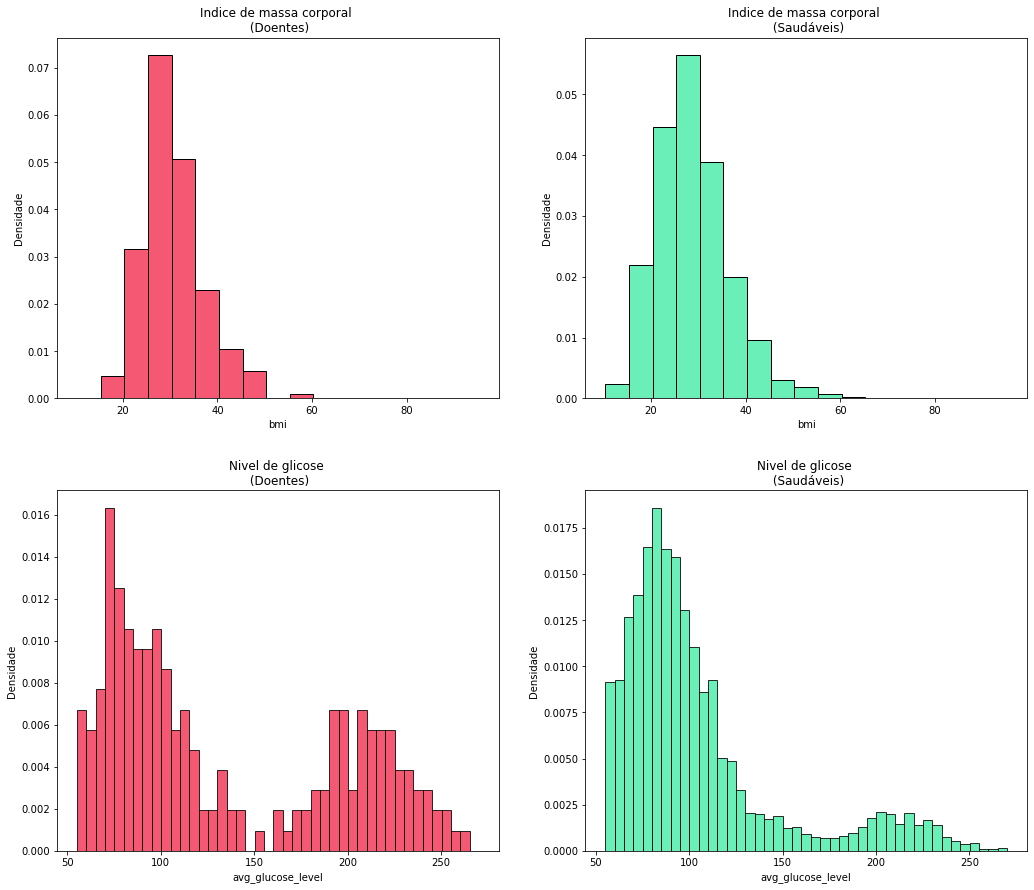

In [20]:
#Lista como o nome das variáveis analisadas
numericas=['bmi','avg_glucose_level']
#separando em categorias daqueles que tiveram e não tiveram AVC
doente=Stroke[Stroke.stroke=='Doente']
saudavel=Stroke[Stroke.stroke=='Saudável']

# Função que plota o histograma
def plot_hist(dados, x, faixa, cor):
    sns.histplot(dados, x=x, bins=faixa, stat='density', color=cor)
    plt.ylabel('Densidade')
    return None

# Faixa de valores no histograma
faixa_bmi = np.arange(min(Stroke.bmi),max(Stroke.bmi), 5)
faixa_glicose=np.arange(min(Stroke.avg_glucose_level),max(Stroke.avg_glucose_level),5)

# Gera figura para plotagem
plt.figure(figsize=(15,13))

# Indice de massa corporal para doentes
plt.subplot(2,2,1)
plot_hist(doente, 'bmi', faixa_bmi , '#F12043')
plt.title('Indice de massa corporal \n (Doentes)')
plt.xlabel(f'{numericas[0]}')
# Indice de massa corporal para saudáveis
plt.subplot(2,2,2)
plot_hist(saudavel, 'bmi', faixa_bmi , '#39eaa1')
plt.title('Indice de massa corporal \n (Saudáveis)')
plt.xlabel(f'{numericas[0]}')
# Nivel de glicose para doentes
plt.subplot(2,2,3)
plot_hist(doente, 'avg_glucose_level', faixa_glicose, '#F12043')
plt.title('Nivel de glicose \n (Doentes)')
plt.xlabel(f'{numericas[1]}')
# Nivel de glicose para saudáveis
plt.subplot(2,2,4)
plot_hist(saudavel, 'avg_glucose_level', faixa_glicose, '#39eaa1')
plt.title('Nivel de glicose \n (Saudáveis)')
plt.xlabel(f'{numericas[1]}')
# Exibe gráficos
plt.tight_layout(pad=3.0)
plt.show()

Conclusão:
    <li>Variável BMI: Em relação ao índice de massa corporea, observa-se no gráfico uma assimetria à direita para ambos os tipos de pacientes. Nesse sentido, para os pacientes doentes há um predomínio de índices na faixa dos 20 kg/m² até 40 kg/m², indicando que até mesmo <a href="https://www.tuasaude.com/imc/">indices de massa corpórea considerados "ideais"</a> (na faixa dos 20 até 30) não são impeditivos em relação a ocorrência de AVC.</li>
    <li>Variável Avg_glucose_level: Para valores de até 150 mg/dl o nível de glicose sanguínea é bem parecido entre doentes e saudáveis. No entanto, para valores acima de 150 mg/dl há um maior predomínio de pacientes doentes em relação aos saudáveis. Logo, pode-se inferir que pacientes diabéticos <a href='https://cerpe.com.br/saude/glicose-alta-baixa-normal#:~:text=Valores%20de%20refer%C3%AAncia%20de%20glicemia,inferior%20a%2070%20mg%2FdL'>(valores acima de 126)</a> tendem a ter maior chance de possuir AVC. 

<div id="varage"></div>

### Variável age

Text(0.5, 0, 'Idade')

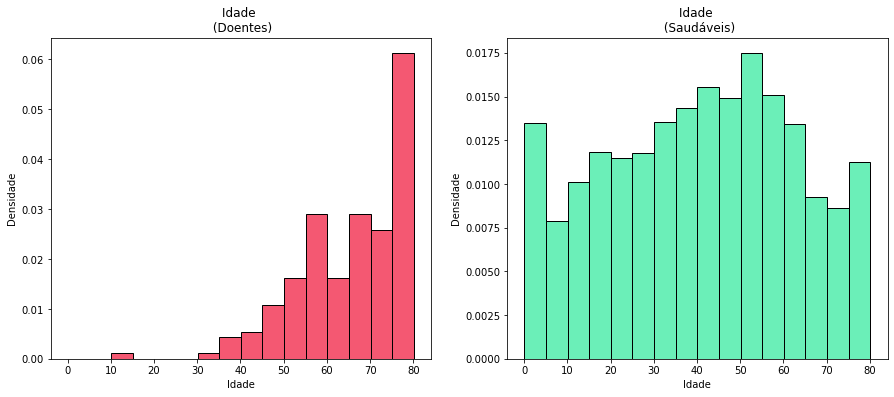

In [21]:
# Gera figura para plotagem
plt.figure(figsize=(15,13))
faixa_age = np.arange(min(Stroke.age),max(Stroke.age),5)
# Idade para doentes
plt.subplot(2,2,1)
plot_hist(doente, 'age', faixa_age , '#F12043')
plt.title('Idade \n (Doentes)')
plt.xlabel('Idade')
# Idade para saudáveis
plt.subplot(2,2,2)
plot_hist(saudavel, 'age', faixa_age , '#39eaa1')
plt.title('Idade \n (Saudáveis)')
plt.xlabel('Idade')

Observacoes:<ul>
    <li>Para os pacientes saudáveis (não tiveram AVC) percebe-se uma distribuição quase simétrica, ou seja, não há predomínio em relação a qualquer idade.</li>
    <li>Para pacientes doentes (tiveram AVC) nota-se uma distribuição assimétrica à esquerda. Dessa maneira, para valores acima de 58 anos há uma grande densidade de pacientes doentes. Logo, pode-se inferir que a idade avançada é fator preponderante para a ocorrência de AVC.</li>
    </ul>

<div id="analisevarquali"></div>

## Análise das variáveis categóricas

Introdução:<ul>
    <li>Para as variáveis categóricas serão utilizados gráficos de barra nos quais há uma porcentagem para cada categoria da respectiva variável. Dessa maneira, a exploração de dados fica mais rica e, portanto, a análise será melhor aproveitada em predições posteriores.

In [22]:
var_categoricas=Stroke.iloc[:,[0,2,3,4,5,6,9,10]]
var_categoricas


,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,Homem,Não Hipertenso,Cardiopata,Sim,Privado,Urbano,Ex-Fumante,Doente
2,Homem,Não Hipertenso,Cardiopata,Sim,Privado,Rural,Nunca Fumou,Doente
3,Mulher,Não Hipertenso,Não Cardiopata,Sim,Privado,Urbano,Fumante,Doente
4,Mulher,Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Rural,Nunca Fumou,Doente
5,Homem,Não Hipertenso,Não Cardiopata,Sim,Privado,Urbano,Ex-Fumante,Doente
...,...,...,...,...,...,...,...,...
5104,Mulher,Não Hipertenso,Não Cardiopata,Não,Criança,Rural,Desconhecido,Saudável
5106,Mulher,Não Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Urbano,Nunca Fumou,Saudável
5107,Mulher,Não Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Rural,Nunca Fumou,Saudável
5108,Homem,Não Hipertenso,Não Cardiopata,Sim,Privado,Rural,Ex-Fumante,Saudável


<div id="distribpacientes"></div>

## Distribuição dos Pacientes

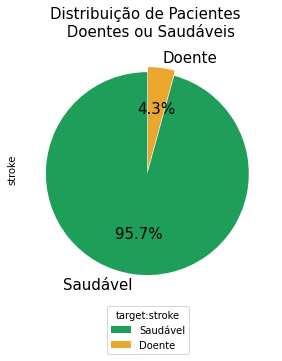

In [23]:
# dividindo o index da categoria stroke
lista_labels=list(var_categoricas["stroke"].value_counts().index)
# configura tamanho da imagem
plt.figure(figsize=(10,15))

# Plota o gráfico inicial: Distribuição da Target
plt.subplot(1, 2, 1)
Stroke["stroke"].value_counts(sort=False).plot.pie(autopct='%1.1f%%', explode= [0.05, 0], textprops={'fontsize': 15}, startangle = 90, labels=lista_labels, colors=['#1E9E58', '#EBA72D', '#44EB90'])
titulo = 'Distribuição de Pacientes \n Doentes ou Saudáveis'
plt.title(titulo, fontsize=15)
plt.legend(loc=8, title = 'target:stroke', title_fontsize=10, 
           bbox_to_anchor=(0.25, -0.25, 0.5, 0.5),  fontsize=10)

Observações:<ul>
    <li>Para o conjunto de dados analisado, percebe-se uma discrepância entre os pacientes saudáveis (não tiveram AVC) e doentes (tiveram AVC). Desse modo, quase 96% dos pacientes analisados não tiveram AVC, isto é, para a análise dos pacientes doentes foram disponibilizados poucos valores (4.3% do total) em relação à todos os valores da base de dados. Dessa maneira, imprecisões maiores poderão ser analisadas na exploração e predição de valores em relação aos pacientes doentes no prosseguimento do projeto.</li> 

In [24]:
# importando bibliotecas para a análise interativa
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
var_categoricas

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,Homem,Não Hipertenso,Cardiopata,Sim,Privado,Urbano,Ex-Fumante,Doente
2,Homem,Não Hipertenso,Cardiopata,Sim,Privado,Rural,Nunca Fumou,Doente
3,Mulher,Não Hipertenso,Não Cardiopata,Sim,Privado,Urbano,Fumante,Doente
4,Mulher,Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Rural,Nunca Fumou,Doente
5,Homem,Não Hipertenso,Não Cardiopata,Sim,Privado,Urbano,Ex-Fumante,Doente
...,...,...,...,...,...,...,...,...
5104,Mulher,Não Hipertenso,Não Cardiopata,Não,Criança,Rural,Desconhecido,Saudável
5106,Mulher,Não Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Urbano,Nunca Fumou,Saudável
5107,Mulher,Não Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Rural,Nunca Fumou,Saudável
5108,Homem,Não Hipertenso,Não Cardiopata,Sim,Privado,Rural,Ex-Fumante,Saudável


In [25]:
# análise interativa das variáveis categóricas
@interact(categorias=sorted(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']))
#função que faz a tabela_cruzada bem como o gráfico barplot para as categóricas
def tabela_cruzada(categorias):
    tabela=pd.crosstab(index=var_categoricas.stroke,columns=var_categoricas[categorias],normalize='index')*100
    display(HTML(tabela.to_html()))
    tabela.plot(kind='bar', stacked=True)
    plt.title(f"Distribuição de doentes e saudáveis por {categorias}")
    plt.legend( bbox_to_anchor=(1.05, 1), borderaxespad=0.)


interactive(children=(Dropdown(description='categorias', options=('Residence_type', 'ever_married', 'gender', …

Conclusão:<ul>
    <li>Variável Residence_type: Para o tipo de residência os valores coletados não indicam disparidade entre os pacientes que moram em ambientes rurais ou urbanos. Logo, a variável não possui indicativos de que pode ajudar na predição do AVC.</li>
    <li>Variável ever_married: Em relação a variável que indica o casamento, percebe-se pela análise gráfica que, em relação aos pacientes doentes, a grande maioria é casado. Portanto, a convivência com outra pessoa pode indicar maiores possibilidades de AVC.</li>
    <li>Variável gender: Para ambos tipos de paciente, sejam eles doentes ou saudáveis, quase 60% dos pacientes são do sexo masculino. No entanto, a disparidade é muita pequena entre os valores e, dessa maneira, ainda não se pode prever o sexo predominante para quem possui ou não AVC.</li>
    <li>Variável heart_disease: Observando-se a variável que diz respeito a ocorrência de cardiopatia percebe-se uma maior chance (19% do total de doentes) de um paciente cardiopata já ter tido AVC do que um paciente cardiopata não ter tido AVC (4% do total de saudáveis). Portanto, as cardiopatias podem ser indícios para uma maior chance de AVC.</li>
    <li>Variável hypertension: Em analogia a variável heart_disease pode-se percebe-se o mesmo comportamento para a categoria que analisa a ocorrência de hipertensão, ou seja, para pacientes hipertensos (28.7% do total de doentes) há uma maior chance de ocorrência de AVC em relação aos pacientes hipertensos que não tiveram AVC (8.3% do total de saudáveis). Portanto, a hipertensão pode ser indício para uma maior chance de AVC.</li>
    <li>Variável smoking_status: Considerando pacientes que tiveram AVC, há um crescimento percentual de fumantes e ex-fumantes em relação aqueles pacientes considerados saudáveis. Então, o tabaco pode, em alguma medida, influenciar na possível ocorrência de acidentes vasculares cerebrais.</li>
    <li>Variável work_type:
        <ul>
            <li>Trabalho Governamental, Nunca Trabalhou e Privado: Para estes tipos de trabalho não se notou quase nenhuma diferença entre os pacientes saudáveis ou doentes, embora para os pacientes que tiveram AVC a grande maioria (60%) trabalha em ambientes privados. Nesse sentido o ambiente privado pode, em alguma medida, se mostrar como um indicador de acidentes vasculares cerebrais.</li>
            <li>Trabalhadores autônomos: Para os trabalhadores autônomos há uma maior concentração de pacientes doentes (25.7% do total de doentes) em relação aos saudáveis (15.3 % do total de saudáveis). Dessa maneira, apesar da pequena disparidade, pode haver em relação a ser trabalhador autônomo, visto que esta categoria não possui emprego certo. Logo, há maior chance do desenvolvimento de um AVC.</li>
            <li>Para crianças não podem ser feitas análises precisas visto que são poucos os dados de crianças (independente da idade) que tiveram AVC. Logo, para esta categoria não se pode predizer muito.</li>

<div id="modelos"></div>

# Modelos de predição

<div id="definicao"></div>

## Definição

Os modelos de predição usam dados, algoritmos de estatística, bem como técnicas de "machine learning" para a previsão de resultados futuros. Logo, por meio do conjunto de dados, esses modelos de predição farão previsões futuras para dados já consolidados.

<div id="tiposmodelos"></div>

## Tipos de modelos

Temos dois principais modelos para a predição de uma determinada base de dados:
<ul>
    <li>Modelos de classificação: são modelos capazes de prever uma associação de classe. Por exemplo, a previsão se uma pessoa irá ou não se demitir de uma empresa. Logo, estes tipos de modelos são usadas para variáveis categóricas, visto que o resultado possível é binário, isto é, gira em torno de duas possibilidades (no caso citado sim ou não para a demissão do funcionário).
       Exemplos: Regressão Logística, Árvore de Decisão, Floresta Aleatória, dentre outros.
    <li> Modelos de regressão: são modelos capazes de prever um número. Por exemplo, a previsão de valores de imóveis para os próximos anos. Nesse sentido, esse modelo é usado na predição de variáveis numéricas ou quantitativas.
       Exemplos: Regressão linear, regressão múltipla, dentre outros.

<div id="regreslog"></div>

# Regressão Logística (Logistic Regression)

<div id="defregres"></div>

## Definição do modelo:

Regressão logística é um algoritmo de classificação de aprendizado de máquina usado para prever a probabilidade de uma variável dependente categórica. Na regressão logística, a variável dependente é uma variável binária que contém dados codificados como 1 (sim, sucesso) ou 0 (não, falha). Em outras palavras, o modelo de regressão logística prevê P (Y = 1) em função de X.

<center><img src="foto3.png">

<div id="defregres2"></div>

## Outra Definição do modelo:

É uma técnica recomendada para situações em que a variável dependente é de natureza dicotômica ou binária. Quanto às independentes, tanto podem ser categóricas ou não. A regressão logística é um recurso que nos permite estimar a probabilidade associada à ocorrência de determinado evento em face de um conjunto de variáveis explanatórias.

<div id="pontosaux"></div>

## Pontos auxiliares

Mais alguns pontos precisam ser destacados para o prosseguimento do projeto:
<ul>
    <li>A variável target (resposta) será considerada como eixo Y que, nesse caso, é o que se quer prever ou determinar em função das outras variáveis</li>
    <li>Por meio de uma combinação das outras variáveis independentes, o eixo X será formado para fazer as previsões necessárias para a determinação da variável target.</li>
    <li>Em geral, nos algoritmos de machine learning há uma clara separação entre os dados de treinamento (iremos treinar nossa máquina por meio dos modelos citado) e os dados do teste (a partir deste momento irá se testar todo o aprendizado da máquina para a predição dos valores). Logo, não será diferente neste onde haverá a separação destas duas bases.</li>
     <li>Neste caso, a regressão logística usa um função chamada sigmóide (será abordada em seguida) para prever os valores 0 ou 1 (modelo binário) por meio do gráfico apresentado anteriormente. Logo, esta função ajusta os valores para prever o que irá acontecer com a variável target (resposta).</li> 

<div id="funcsigmoide"></div>

## Função Sigmóide

A função sigmóide é responsável por converter cada valor de X obtido de uma transformação linear anterior (modelo linear de X em Y) em probabilidades, ou seja, quanto maior esse valor (score) de X, maiores as probabilidades para o eixo Y. Logo, a função sigmóide é dada pela seguinte fórmula:
    $$P(Y=1) = \frac{1}{1+e^{-x}}$$



Para utilizar o modelo de regressão logística para discriminação de dois grupos, a regra de classificação é a seguinte:

- Se $P(Y=1) > 0,5$ então classifica-se $Y = 1$ (probalidade 1, ou seja, ocorre o evento)
- Se $P(Y=1) < 0,5$ então classifica-se $Y = 0$ (probalidade 0, ou seja, não ocorre o evento)

<div id="vantagensregres"></div>

## Vantagens da Regressão Logística

<ul>
    <li>Facilidade para lidar com variáveis independentes categóricas.</li>
    <li>Fornece resultados em termos de probabilidade.</li>
    <li>Facilidade de classificação de indivíduos em categorias.</li>
    <li>Requer pequeno número de suposições.</li>
    <li>Alto grau de confiabilidade.</li>
</ul>

<div id="passo1regres"></div>

## 1° Passo: Implementando o Modelo

Para a implementação de fato do modelo, é necessário dividir a base de dados em dois grupos:
<ul>
    <li>Dados de treino: esses dados serão aqueles utilizados para montar de fato o modelo, isto é, são os dados que ensinam ao computador como se comporta cada variável em relação à variável target e o quanto e como cada uma influenciará uma possível classificação.</li>
    <li>Dados de teste: esses dados serão aqueles utilizados para testar a precisão do modelo, isto é, são dados não iguais aos de treino para verificar o quão preciso está o modelo nas suas classificações.</li>
</ul>

In [26]:
# Separando base de dados por categorias - doentes e saudáveis
saudaveis=Stroke_numeric[Stroke_numeric.stroke==0]
doentes=Stroke_numeric[Stroke_numeric.stroke==1]
# Embaralhando a base de dados por linhas para evitar repetições e fazer melhores predições
saudaveis_embaralhado=saudaveis.sample(frac=1)
saudaveis_embaralhado=saudaveis_embaralhado.to_csv('embaralhado.csv')

In [27]:
# Ler novamente o arquivo com a nova ordem de embaralhamento
saudaveis_embaralhado = pd.read_csv('embaralhado.csv')
saudaveis_embaralhado= saudaveis_embaralhado.rename(columns={'Unnamed: 0': 'ID'})
saudaveis_embaralhado.drop(columns='ID',axis=1,inplace=True)
saudaveis_embaralhado

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,65.0,0,0,0,1,2,60.70,31.3,3,0
1,0,27.0,0,0,0,3,1,149.95,25.9,3,0
2,0,62.0,0,0,1,3,1,82.57,27.5,1,0
3,1,62.0,0,0,1,4,2,85.12,36.3,2,0
4,0,27.0,0,0,1,3,2,80.57,39.8,4,0
...,...,...,...,...,...,...,...,...,...,...,...
4694,1,45.0,0,0,1,1,1,86.99,37.9,3,0
4695,0,21.0,0,0,0,3,2,58.66,31.3,3,0
4696,0,19.0,0,0,0,3,1,66.70,24.7,3,0
4697,1,33.0,0,0,1,1,1,77.94,28.7,3,0


Observação: Anteriormente foram percebidos alguns incovenientes em relação à base de dados, ou seja, o número de doentes e saudáveis é muito discrepante, ou seja, 96% da base de dados trabalhada refere-se aos pacientes que não tiveram AVC. Dessa maneira, para que os modelos de previsão não fiquem tão destoantes do dataframe que se refere aos pacientes saudáveis, essa base de dados será dividida em outros 18 datasets menores e, além disso, cada dataframe correspondente será adicionado ao dataframe dos pacientes doentes (cerca de 210 linhas) de modo a tornar a análise mais precisa e confiável. Logo, o código a seguir será utilizado para o fim descrito anteriormente.

In [28]:
def divide_data(df):
    lista=[]
    for i in range(19):
        lista.append(pd.merge(left=df.iloc[i*int(len(df)/18):(i+1)*int(len(df)/18)],right=doentes,how='outer'))
    del lista[-1]
    return lista


<p>Conforme a mudança citada anteriormente, a separação para as bases de treinamento e teste ocorrerá para cada dataframe descrito na função anterior (por isso o comando <em>for</em> é utilizado). Ademais, a partir deste momento todas as medidas que serão calculadas (percentuais da matriz de confusão, acurácia do modelo e parâmetros da validação cruzada) para os modelos de predição utilizados seguirão a média dos 18 dataframes feitos, visto que tal prática tende a fornecer melhores estimativas do modelo.</p>
<p>Para dividir a base em treinamento e teste o comando da biblioteca scikit-learn chamado <em>train_test-split()</em> será utilizado de modo que o argumento chamado de <em>test_size</em> pegará 20% (número geralmente utilizado) da base de treinamento para implementar o modelo. Além disso, o comando <em>LogisticRegression()</em> aplica o modelo. Por fim, os comandos <em>confusion_matrix</em> e <em>accurracy_score</em> implementam a matriz de confusão do modelo (explicada adiante) e acurácia (precisão) do modelo, respectivamente. 

In [29]:
from sklearn.metrics import confusion_matrix # importando função da matriz de confusão
VN=[]
FP=[]
FN=[]
VP=[]
for df in divide_data(saudaveis_embaralhado):
    X=df.drop(columns='stroke',axis=1) # todas as variáveis independentes
    y=df['stroke'] # variável target (resposta)
    # teste do modelo
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) # separação entre entre os dados do treinamento e teste
    Logistic_model = LogisticRegression(random_state=0).fit(X_train,y_train)
    Logistic_pred = Logistic_model.predict(X_test)
    # implementando para cada lista 4 valores dentro da matriz de confusão que serão explicados adiante
    tn,fp,fn,tp=confusion_matrix(y_test,Logistic_pred).ravel() # implementando a matriz de confusão para cada dataframe
    VN.append(tn)
    FP.append(fp)
    FN.append(fn)
    VP.append(tp)
    # acurácia de cada dataframe
    acuracia_lr=metrics.accuracy_score(y_test,Logistic_pred)
print(f'A acurácia média para o modelo é: {np.mean(acuracia_lr)}') # acurácia média do modelo

A acurácia média para o modelo é: 0.7340425531914894


<div id="passo2regres"></div>

## 2° Passo: Implementando a validação cruzada

<p>A validação cruzada é uma técnica para avaliar a capacidade de generalização de um modelo a partir de um conjunto de dados.
Esta técnica é amplamente empregada em problemas onde o objetivo da modelagem é a predição. Busca-se então estimar o quão preciso é este modelo na prática, ou seja, o seu desempenho para um novo conjunto de dados.</p>
<p>Para o modelo serão calculados o desvio padrão e a média para o resultado obtido na soma dos 18 dataframes citados anteriormente.</p>
<p>O comando <em>cross_val_score</em> aplica a validação cruzada e, com isso, pode-se calcular tanto a média (<em>media_lr</em>) quanto o desvio padrão (<em>desv_pad_lr</em>) do modelo.

In [30]:
for df in divide_data(saudaveis_embaralhado):
# Calcula resultados, tipo de avaliação do modelo (scoring=acurracy)
    resultados_lr = cross_val_score(Logistic_model, X, y, cv=6, scoring='accuracy')

# Calcula média e desvio padrão (em porcentagem)
media_lr = np.mean(resultados_lr) * 100
desv_pad_lr = np.std(resultados_lr, ddof=1) * 100

# Exibe resultados
print('-'*59)
print('Cross Validation aplicado ao modelo de Regressão Logística:')
print('-'*59, '\n')
print(f'Média: {media_lr:.4f} %')
print(f'Desvio Padrão: {desv_pad_lr:.4f} %')
print('---------------------------------------------')

-----------------------------------------------------------
Cross Validation aplicado ao modelo de Regressão Logística:
----------------------------------------------------------- 

Média: 76.1766 %
Desvio Padrão: 5.6545 %
---------------------------------------------


<div id="passo3regres"></div>

## 3° Passo: Matriz de confusão

Em problemas de classificação binária é utilizada uma matriz de tabulação cruzada dos resultados preditos com as classes originais observadas, conhecida como matriz de confusão. Contudo, esta matriz busca entender a relação entre acertos e erros que o modelo apresenta. Pode parecer complexo, mas os resultados podem ser resumidos em quatro valores iniciais, sendo:
<ul>
    <li>Verdadeiro Positivo (VP) que significa que a classe prevista e observada originalmente fazem parte da classe positiva;</li>
    <li>Falso Positivo (FP - Erro tipo I) que significa que a classe predita retornou positivo mas a original observada era negativa;</li>
    <li>Verdadeiro Negativo (VN) os valores preditos e observados fazem parte da categoria negativa;</li>
    <li>Falso Negativo (FN - Erro tipo II) representa que o valor predito resultou na classe negativa mas o original observado era da classe positivo.</li>
</ul>

Para a implementação do modelo haverá abaixo uma estrutura de matriz (array abaixo) para os casos citados acima na seguinte ordem: Verdadeiro Positivo (VP), Falso Positivo (FP), Falso negativo(FN) e Verdadeiro Negativo(VN). Além disso, precisa-se saber que o valor 0 corresponde aos saudáveis e o valor 1 corresponde aos doentes. Logo, por meio do comando <em>sns.heatmap()</em> a matriz de confusão é plotada. 

In [31]:
# Soma dos valores
total=np.mean(VN)+np.mean(FN)+np.mean(FP)+np.mean(VP)
z=np.array([[np.mean(VN),np.mean(FP)],[np.mean(FN),np.mean(VP)]]) # valores médios para os valores explicados acima
z

array([[39.77777778, 12.22222222],
       [13.16666667, 28.83333333]])

Text(33.0, 0.5, 'Valores verdadeiros')

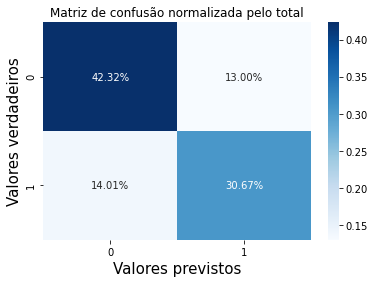

In [32]:
ax = plt.axes()
sns.heatmap(z/total, annot=True, 
            fmt='.2%', cmap='Blues')
ax.set_title('Matriz de confusão normalizada pelo total')
plt.xlabel('Valores previstos', fontsize = 15) # x-axis label com fontsize 15
plt.ylabel('Valores verdadeiros', fontsize = 15) # y-axis label com fontsize 15

<div id="resultregres"></div>

## Resultados:

<ul>
    <li>Em relação aos dados cujo valor verdadeiro é 0 (saudáveis), 39.01% (valor em relação ao total e não em relação a coluna) destes foram classificados como ausente (verdadeiro negativo), enquanto 16.31% foram classificados pelo modelo como presente (falso positivo) para a primeira linha da matriz.</li>
    <li>Em relação aos dados cujo valor verdadeiro é presente, cerca de 27.96% foram classificados como presente (verdadeiro positivo), enquanto 16.73% foram classificados como ausente (falso negativo) para a segunda linha da matriz.</li>
</ul>

<div id="acuraciaregres"></div>

## Acurácia - Matriz de confusão

Nesse sentido pode-se calcular também a precisão (acurácia) da matriz de confusão que é a quantidade classificada como Positivos e Negativos corretamente (nosso caso são os doentes e saudáveis corretamente previstos pelo modelo) da seguinte forma:<br>

<br>$$Acurácia = \frac{(TP + TN)}{(TP + TN + FP + TN)}$$<br>

In [33]:
print(f'A acuracia da matriz de confusão é : {(np.mean(VN)+np.mean(VP))*100/total} %')

A acuracia da matriz de confusão é : 72.9905437352246 %


<div id="conclusaoregres"></div>

## Conclusão sobre o modelo de Regressão Logística:

<ul>
    <li>Percebe-se, portanto, que o modelo preditivo para AVC (acidente vascular cerebral) utilizando o Algoritmo da Regressão Logística tem uma acurácia razoável, oscilando em cerca de 70%. Tal resultado pode ser aprimorado, conforme se ajuste as especificações do modelo $-$ como alterações na função sigmóide, por exemplo $-$, ou, de forma externa, caso a coleta de dados siga maior rigor de qualidade, conforme descrito anteriormente.</li>
</ul>

  

<div id="arvoredecisao"></div>

# Árvore de decisão

<div id="defarvoredecisao"></div>

## Definição do modelo:

A Árvore de Decisão é um tipo de algoritmo de aprendizagem de máquina supervisionado que se baseia na ideia de divisão dos dados em grupos homogêneos, podendo ser utilizadas em um cenário de classificação ou regressão. No nosso caso, iremos usá-la no critério de classificação.

<div id="vantagensarvore"></div>

## Vantagens da Árvore de decisão:

<li> Possui um fácil entendimento, pois não requer nenhum conhecimento estatístico para a sua interpretação.</li>
<li>Aceita tanto dados categóricos quanto numéricos, diminuindo a necessidade da limpeza de dados em comparação com outros modelos.</li>

<div id="desvantagensarvore"></div>

## Desvantagens da Árvore de decisão:

<li>Ela é propensa a sofrer overfitting (sobreajuste), se ajustar muito aos dados de treino e não ter uma performance muito boa com os dados de teste.</li>
<li>São instáveis, portanto pequenas alterações nos dados de treino produzem novas árvores.</li>

<div id="exemploarvore"></div>

## Exemplo:

<img src="foto2.png">

A partir do conjunto de dados é feito um "split", cada "split" representa um nó da árvore. Temos o nó raiz onde começa a árvore, os nós de decisão, sendo que essas decisões serão tomadas a partir de uma amostra de teste, e por fim temos os nós folhas onde é atribuído a classe (Yes/No) no caso da classificação e a média das observações no caso da regressão.

<div id="terminologarvore"></div>


## Terminologias:

<ol>
    <li>O nó raiz é o atributo que melhor divide o conjunto de dados.</li>
    <li>Nós de decisão são representadas pelas condições lógicas (IF/ELSE) que determinam o caminho dentro da árvore.</li>
    <li>Branch/Sub da árvore, são pequenas árvores no meio do caminho a partir do nó de decisão.</li>
    <li>Nó terminal/folha estão na parte inferior da árvore e, como já foi dito, podem conter uma classe ou um valor contínuo.</li>
</ol>

<img src="foto1.png">

Para um aprofundamento ainda maior, consulte o site: https://minerandodados.com.br/arvores-de-decisao-conceitos-e-aplicacoes/

<div id="objetarvore"></div>

## Qual o objetivo da árvore de decisão?

É encontrar o atributo que gera a melhor divisão dos dados, subconjunto com maior pureza. Existem algumas métricas para a definição de pureza, ou seja, qual será a métrica utilizada para decidir qual é o melhor atributo que divide os nossos dados gerando a partição mais pura. No nosso caso, iremos usar a entropia.

**Entropia**

A entropia de um conjunto pode ser definida como sendo o grau de pureza desse conjunto. Este conceito emprestado pela Teoria da Informação define a medida de "falta de informação", mais precisamente o número de bits necessários, em média, para representar a informação em falta, usando codificação óptima.

Dado um conjunto S, com instâncias pertencentes à classe i, com probabilidade pi, temos:

$$Entropia (S) =  \sum_{i=1}^n p_i \cdot \log_{2}p_i$$  $$(1)$$

Onde:

S é o conjunto de exemplo de treino;
p+ é a porção de exemplos positivos;
p- é a porção de exemplos negativos;

A entropia é dada pelo desdobramento da equação (1)

$$Entropia (S) =   -p_+ \cdot \log_{2}p_+ - p_- \cdot \log_{2}p_-$$

**Ganho**

O ganho (gain) define a redução na entropia. Ganho(S,A) significa a redução esperada na entropia de S, ordenando pelo atributo A. O ganho é dado pela seguinte equação:

$$Ganho(S, A) = Entropia(S) - \sum_{v\in Valores(A)}\frac{\vert S_v \vert}{\vert S \vert}Entropia(S_v)$$

em que:

- $S_v$ é o subconjunto de $S$ quando $x=A$
- $v$ é um elemento de $Valores(A)$
- $Valores(A)$ representa os possíveis valores de $A$

Para um aprofundamento ainda maior, consulte o site: http://web.tecnico.ulisboa.pt/ana.freitas/bioinformatics.ath.cx/bioinformatics.ath.cx/indexf23d.html?id

<div id="evitaroverfit"></div>

## Como evitar o overfitting?

Podemos querer gerar uma árvore de decisão a partir de uma base que tenha um grande número de atributos e, se alguns critérios não forem especificados afim de controlar a árvore, vamos correr o risco dela representar cada amostra de dados, gerando uma árvore muito grande e um modelo extremamente complexo, com bons resultados para os dados de treino e baixa performance para os dados de teste, ou seja vai sofrer "overfitting". Por isso, prevenir o sobreajuste é fundamental ao se modelar uma árvore de decisão.

Algumas estratégias que podemos adotar para ajudar a evitar o overfitting:

<li>Especificar o número mínimo de amostras para divisão do nó. Valores altos previnem a criação de modelos complexos ou podem causar underfitting.</li>
<li>Especificar o número mínimo de amostras para o nível folha. Isso nos permite controlar o crescimento da árvore e deve ser considerado em cenários com dados desbalanceados.</li>
<li>Profundidade máxima da árvore.</li>
<li>Número máximo de features para considerar durante a divisão.</li>

<div id="comofunciona"></div>

## Como vai funcionar a base de dados?

Vamos dividir o nosso conjunto de dados em dois ramos:

- **Dados treino**: Conforme podemos imaginar, dados de treino são os dados que serão apresentados ao algoritmo de machine learning para criação do modelo (Variáveis em relação a variável target). Estes dados costumam representar cerca de 80% da totalidade dos dados.
- **Dados teste**: Serão apresentados ao modelo após a sua criação, simulando previsões reais que o modelo realizará, permitindo assim que o desempenho real seja verificado. Estes dados costumam representar cerca de 20% da totalidade dos dados.

Para um aprofundamento ainda maior, consulte o site: https://didatica.tech/dados-de-treino-e-teste/

O código abaixo mostra a preparação dos dados.

<div id="passo1arvore"></div>

##  1° Passo: Implementando a árvore de decisão

A biblioteca que será utilizada é a do scikit-learn [(documentação)](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Para implementar o modelo, é utilizado o *DecisionTreeClassifier()* e aplica-se a função *fit()*, que recebe os dados de treino e o target de treino para classificá-los.

#### Parâmetros do classificador DecisionTreeClassifier:

<ul>
    <li>criterion: medida de qualidade da divisão, aqui que definimos qual dessas métricas (Índice Gini, Chi-Square, Information Gain ou a redução da variância) iremos usar.</li>
    <li>splitter: estratégia utilizada para dividir o nó de decisão.</li>
    <li>max_depth: profundidade máxima da árvore.</li>
    <li>min_samples_split: número de amostras mínimas para considerar um nó para divisão.</li>
    <li>min_samples_leaf: número de amostras mínimas no nível folha.</li>
</ul>

In [34]:
VN2=[]
FP2=[]
FN2=[]
VP2=[]
for df in divide_data(saudaveis_embaralhado):
    X=df.drop(columns='stroke',axis=1) # todas as variáveis independentes
    y=df['stroke'] # variável target (resposta)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    # Cria árvore de decisão
    arvore_decisao = DecisionTreeClassifier(criterion='entropy',max_depth=None)
    # Treina o modelo
    modelo_dt = arvore_decisao.fit(X_train, y_train)
    arvore_decisao_pred = modelo_dt.predict(X_test)
    acuracia_dt= metrics.accuracy_score(y_test,arvore_decisao_pred)*100
    tn2,fp2,fn2,tp2=confusion_matrix(y_test,arvore_decisao_pred).ravel()
    VN2.append(tn2)
    FP2.append(fp2)
    FN2.append(fn2)
    VP2.append(tp2)
print(f'Precisão do modelo (Decision Tree): {np.mean(acuracia_dt):.4f} %')

Precisão do modelo (Decision Tree): 68.0851 %


In [35]:
# Profundidade da árvore gerada
print(f'Profundidade da árvore: {modelo_dt.tree_.max_depth}')

Profundidade da árvore: 19


<div id="passo2arvore"></div>

## 2° Passo: Validação Cruzada

In [36]:
for df in divide_data(saudaveis_embaralhado):
# Calcula resultados
    resultados_dt = cross_val_score(modelo_dt, X, y, cv=6, scoring='accuracy')

# Calcula média e desvio padrão (em porcentagem)
media_dt = np.mean(resultados_dt) * 100
desv_pad_dt = np.std(resultados_dt, ddof=1) * 100

# Exibe resultados
print('-'*59)
print('Cross Validation aplicado ao modelo de Arvore de Decisao:')
print('-'*59, '\n')
print(f'Média: {media_dt:.4f} %')
print(f'Desvio Padrão: {desv_pad_dt:.4f} %')
print('---------------------------------------------')

-----------------------------------------------------------
Cross Validation aplicado ao modelo de Arvore de Decisao:
----------------------------------------------------------- 

Média: 70.8753 %
Desvio Padrão: 6.0645 %
---------------------------------------------


<div id="passo3arvore"></div>

##  3° Passo: Matriz de Confusão

Em analogia ao modelo anterior, vamos plotar a nossa matriz de confusão para o modelo da árvore de decisão.

In [37]:
z2=np.array([[np.mean(VN2),np.mean(FP2)],[np.mean(FN2),np.mean(VP2)]])
z2

array([[36.5       , 15.5       ],
       [16.33333333, 25.66666667]])

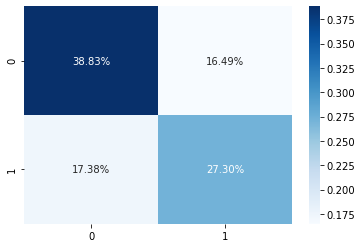

In [38]:
sns.heatmap(z2/np.sum(z2), annot=True, 
            fmt='.2%', cmap='Blues')
# 38.38888889/(13.61111111+17.38888889+ 24.61111111+38.38888889)

<div id="resultarvore"></div>

## Resultados:

<ul>
    <li>Em relação aos dados cujo valor verdadeiro é 0 (saudáveis), 39.01% (valor em relação ao total e não em relação a coluna) destes foram classificados como ausente (verdadeiro negativo), enquanto 16.31% foram classificados pelo modelo como presente (falso positivo) para a primeira linha da matriz.</li>
    <li>Em relação aos dados cujo valor verdadeiro é presente, cerca de 27.96% foram classificados como presente (verdadeiro positivo), enquanto 16.73% foram classificados como ausente (falso negativo) para a segunda linha da matriz.</li>
</ul>

<div id="acuraciaarvore"></div>

## Acurácia - Matriz de confusão

In [39]:
total2=np.mean(VN2)+np.mean(FN2)+np.mean(FP2)+np.mean(VP2) # Soma das médias obtidas
print(f' A acuracia da matriz de confusão é : {(np.mean(VN2)+np.mean(VP2))*100/total2} %')

 A acuracia da matriz de confusão é : 66.13475177304964 %


<div id="conclusaoarvore"></div>

## Conclusão sobre o modelo de Árvore de Decisão:

<ul>
   <li>Percebe-se, portanto, que o modelo preditivo para AVC (acidente vascular cerebral) utilizando o Algoritmo da Árvore de Decisão tem uma acurácia adequada, de aproximadamente 67%. Tal resultado pode ser aprimorado, conforme se ajuste as especificações do modelo $-$ como evitar o overfitting, por exemplo $-$ ou buscar não fazer alterações nos dados de treino para que não sejam produzidas novas árvores.</li>
</ul>

<div id="conclusaogeral"></div>

# Conclusão

<div id="comparamodelos"></div>

## Comparação dos modelos:

In [42]:
# Exibe resultados obtidos por cada modelo
print('==='*9)
print('COMPARAÇÃO ENTRE OS MODELOS')
print('==='*9, '\n')
print(f'Árvore de Decisão    |  Precisão: {np.mean(acuracia_dt):.4f} % ')
print(f'Regressão Logística  |  Precisão: {np.mean(metrics.accuracy_score(y_test,Logistic_pred)*100):.4f} % ')

COMPARAÇÃO ENTRE OS MODELOS

Árvore de Decisão    |  Precisão: 68.0851 % 
Regressão Logística  |  Precisão: 73.4043 % 


Com base nos resultados obtidos, conclui-se que a Regressão Logística obteve o melhor resultado em termos de acurácia, diferenciando-se pouco em relação à Árvore de Decisão (cerca de 6,4%). Como era de se esperar, a Regressão Logística performou melhor que a Árvore de Decisão, haja vista a sua capacidade de reparar um possível overfitting.

Porém, esses valores não são fixos porque, a cada vez que se executa o código, a base de treino/teste é novamente dividida. Assim, é de se esperar uma pequena flutuação na análise da precisão.

In [43]:
# Exibe resultados obtidos por cada modelo na validação cruzada
print('==='*16)
print('COMPARAÇÃO ENTRE OS MODELOS NA VALIDAÇÃO CRUZADA')
print('==='*16, '\n')
print(f'Árvore de Decisão    |  Média: {media_dt:.4f} %  | Desvio Padrão: {desv_pad_dt:.4f} %')
print(f'Regressão Logística  |  Média: {media_lr:.4f} %  | Desvio Padrão: {desv_pad_lr:.4f} % ')

COMPARAÇÃO ENTRE OS MODELOS NA VALIDAÇÃO CRUZADA

Árvore de Decisão    |  Média: 70.8753 %  | Desvio Padrão: 6.0645 %
Regressão Logística  |  Média: 76.1766 %  | Desvio Padrão: 5.6545 % 


Em relação ao cálcuo da validação cruzada, os valores da média apresentam divergência de aproximadamente 2 pontos percentuais em relação à acurácia do modelo calculada anteriormente.

De fato, os modelos apresentaram um baixo percentual como desvio padrão, no entanto o desvio padrão da Regressão Logística é o maior entre os modelos. Esse fato é justificado pela maior média da Regressão Logística, pois dessa forma os valores de desvio padrão vão se afastar desse valor médio com mais facilidade do que na Árvore de Decisão.

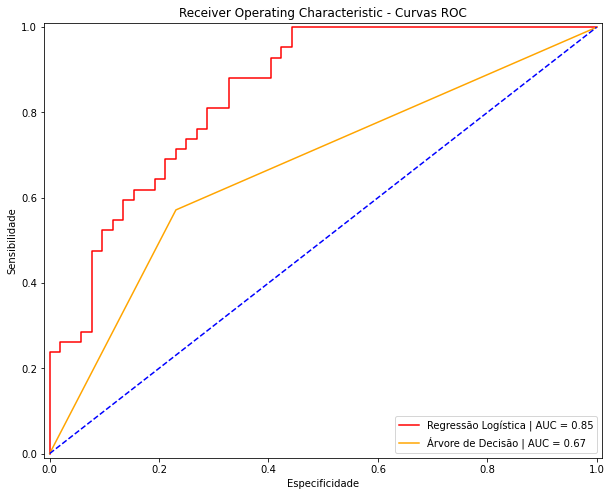

In [44]:
# Plota curvas ROC para cada modelo
plt.figure(figsize=(10, 8))
for df in divide_data(saudaveis_embaralhado):
    # Árvore de decisão
    probabilidades_dt = modelo_dt.predict_proba(X_test)[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, probabilidades_dt)
    roc_auc = metrics.auc(fpr, tpr)
    # Regressão Logística
    probabilidades_lr = Logistic_model.predict_proba(X_test)[:,1]
    fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, probabilidades_lr)
    roc_auc1 = metrics.auc(fpr1, tpr1)



plt.plot(fpr1, tpr1, c='red', label = 'Regressão Logística | AUC = %0.2f' % roc_auc1)#grafico regressao logistica
plt.plot(fpr, tpr, c='orange', label = 'Árvore de Decisão | AUC = %0.2f' % roc_auc)#grafico arvore de decisao



# Configura gráfico
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic - Curvas ROC')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('Sensibilidade')
plt.xlabel('Especificidade')
plt.show()

Com base no gráfico anterior, pode-se perceber que a Regressão Logística é o método que obtém maior sensibilidade em relação à especificidade.

Sensibilidade é a proporção de casos positivos que foram identificados corretamente.
Especificidade é a proporção de casos negativos identificados corretamente.

Por fim, pode-se considerar que os resultados obtidos foram satisfatórios para essa base de dados. A partir de informações um tanto quanto genéricas (hábitos de consumo: fumar, tipo de residência, tipo de trabalho, gênero entre outros) pôde-se obter uma precisão em torno de 72%.

Porém, dada a seriedade do assunto $-$ a qual pode desencadear tomadas de decisões que podem pôr vidas em risco, afetar a qualidade de vida de uma população ou até mesmo comprometer a saúde financeira de um hospital, plano de saúde ou seguradora $-$, essa precisão ainda é insatisfatória.

Com isso, de acordo com a acurácia de nosso modelo de Regressão Logística, o nosso modelo foi capaz de prever corretamente em aproximadamente 72% das vezes se uma pessoa tem ou não um acidente vascular cerebral. Na mesma perspectiva, para a Árvore de Decisão, aproximadamente 68% das vezes são previstos corretamente pelo o modelo.

A fim de obter melhores resultados, é recomendável que se tenha maiores cuidados durante a coleta dos dados, tomando as devidas cautelas com o registro nas unidades corretas, dentro de uma faixa de valores válidos e de maneira precisa. Ademais, outra prática deveria ser realizada afim de melhorar o modelo: Coletar maior quantidade de dados referentes a pacientes doentes (que possuiam AVC) haja vista que com a discrepância de valores entre a base de dados em relação aos pacientes saudáveis os modelos de predição somente serão capazes de fazer um melhor treinamento dos pacientes saudáveis (pacientes em maior número na base de dados). Por isso, uma proporção mais adequada entre o número de pacientes saudáveis e doentes (que tiveram ou não AVC) seria de bom grado para a melhor análise do modelo e melhor estimativa de resposta para a pergunta a ser respondida por este projeto.

<div id="referencias"></div>

# Referências

- https://medium.com/@vitorborbarodrigues/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c
- https://diegonogare.net/2020/04/performance-de-machine-learning-matriz-de-confusao/    
- https://minerandodados.com.br/validacao-cruzada-aprenda-de-forma-simples-como-usar-essa-tecnica/ 
- https://edisciplinas.usp.br/pluginfile.php/3769787/mod_resource/content/1/09_RegressaoLogistica.pdf
- https://matheusfacure.github.io/2017/02/25/regr-log/
- https://blog.idwall.co/o-que-e-machine-learning/]
- https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
- https://cerpe.com.br/saude/glicose-alta-baixa-normal
- https://www.hospitalsiriolibanes.org.br/sua-saude/Paginas/avc-pode-ocorrer-criancas-adolescentes-chances-recuperacao-boas.aspx
- https://minerandodados.com.br/arvores-de-decisao-conceitos-e-aplicacoes/
- http://web.tecnico.ulisboa.pt/ana.freitas/bioinformatics.ath.cx/bioinformatics.ath.cx/indexf23d.html?id
- https://didatica.tech/dados-de-treino-e-teste/
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://www.minhavida.com.br/alimentacao/tudo-sobre/32159-imc